Enter the number of nodes for the path graph:  6


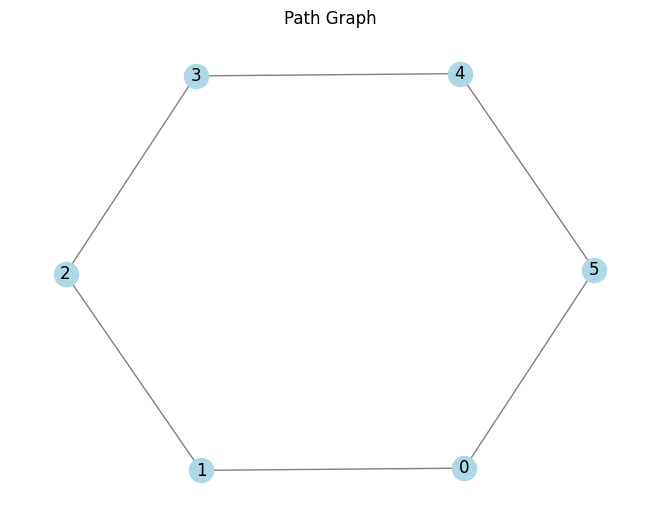


Independent sets V_i (|V_i| ≥ 1):
V_0: [0]
V_1: [1]
V_2: [2]
V_3: [3]
V_4: [4]
V_5: [5]
V_6: [0, 2]
V_7: [0, 3]
V_8: [0, 4]
V_9: [1, 3]
V_10: [1, 4]
V_11: [1, 5]
V_12: [2, 4]
V_13: [2, 5]
V_14: [3, 5]
V_15: [0, 2, 4]
V_16: [1, 3, 5]

Matchings E_i (|E_i| ≥ 1):
E_0: [(0, 1)]
E_1: [(0, 5)]
E_2: [(1, 2)]
E_3: [(2, 3)]
E_4: [(3, 4)]
E_5: [(4, 5)]
E_6: [(0, 1), (2, 3)]
E_7: [(0, 1), (3, 4)]
E_8: [(0, 1), (4, 5)]
E_9: [(0, 5), (1, 2)]
E_10: [(0, 5), (2, 3)]
E_11: [(0, 5), (3, 4)]
E_12: [(1, 2), (3, 4)]
E_13: [(1, 2), (4, 5)]
E_14: [(2, 3), (4, 5)]
E_15: [(0, 1), (2, 3), (4, 5)]
E_16: [(0, 5), (1, 2), (3, 4)]

Filtered T_i = V_i ∪ E_i where |V_i| = |E_i| ≥ 1, disjoint and non-incident (12 total):
T_0: V_0 ∪ E_3 = {Vertices: [0], Edges: [(2, 3)]}
T_1: V_0 ∪ E_4 = {Vertices: [0], Edges: [(3, 4)]}
T_2: V_1 ∪ E_4 = {Vertices: [1], Edges: [(3, 4)]}
T_3: V_1 ∪ E_5 = {Vertices: [1], Edges: [(4, 5)]}
T_4: V_2 ∪ E_1 = {Vertices: [2], Edges: [(0, 5)]}
T_5: V_2 ∪ E_5 = {Vertices: [2], Edges: [(4, 5)]}


In [28]:
import networkx as nx
import networkx.algorithms.matching as nxmatch
import itertools
import matplotlib.pyplot as plt

def generate_cycle_graph(n):
    return nx.cycle_graph(n)

def is_independent_set(G, nodes):
    for u, v in itertools.combinations(nodes, 2):
        if G.has_edge(u, v):
            return False
    return True

def find_all_independent_sets(G):
    nodes = list(G.nodes)
    independent_sets = []
    for r in range(1, len(nodes) + 1):  
        for subset in itertools.combinations(nodes, r):
            if is_independent_set(G, subset):
                independent_sets.append(set(subset))
    return independent_sets

def find_all_matchings(G):
    edges = list(G.edges)
    matchings = []
    for r in range(1, len(edges) + 1):  # only matchings of size ≥ 1
        for subset in itertools.combinations(edges, r):
            if nxmatch.is_matching(G, subset):
                matchings.append(set(subset))
    return matchings

def get_vertices_from_edges(edges):
    return set(u for edge in edges for u in edge)

def is_vertex_edge_disjoint(G, V_i, E_i):
    for v in V_i:
        for u, w in E_i:
            if G.has_edge(v, u) or G.has_edge(v, w):
                return False
    return True

def find_valid_T_sets_equal_size(independent_sets, matchings, G):
    T_sets = []
    for i, V_i in enumerate(independent_sets):
        for j, E_i in enumerate(matchings):
            if len(V_i) == len(E_i) and len(V_i) > 0:
                edge_vertices = get_vertices_from_edges(E_i)
                if V_i.isdisjoint(edge_vertices) and is_vertex_edge_disjoint(G, V_i, E_i):
                    T_sets.append((i, j, V_i, E_i))
    return T_sets

def filter_T_sets_by_size_proximity(T_sets):
    T_sizes = [len(V_i) + len(E_i) for (_, _, V_i, E_i) in T_sets]
    filtered_T = []

    for idx, (i, j, V_i, E_i) in enumerate(T_sets):
        size_i = T_sizes[idx]
        if any(abs(size_i - size_j) <= 1 for k, size_j in enumerate(T_sizes) if k != idx):
            filtered_T.append((i, j, V_i, E_i))
    
    return filtered_T

def visualize_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title("Path Graph")
    plt.show()

if __name__ == "__main__":
    n = int(input("Enter the number of nodes for the path graph: "))
    G = generate_cycle_graph(n)
    visualize_graph(G)

    independent_sets = find_all_independent_sets(G)
    matchings = find_all_matchings(G)

    print(f"\nIndependent sets V_i (|V_i| ≥ 1):")
    for i, V_i in enumerate(independent_sets):
        print(f"V_{i}: {sorted(V_i)}")

    print(f"\nMatchings E_i (|E_i| ≥ 1):")
    for j, E_i in enumerate(matchings):
        print(f"E_{j}: {sorted(E_i)}")

    T_sets_all = find_valid_T_sets_equal_size(independent_sets, matchings, G)
    T_sets = filter_T_sets_by_size_proximity(T_sets_all)

    print(f"\nFiltered T_i = V_i ∪ E_i where |V_i| = |E_i| ≥ 1, disjoint and non-incident ({len(T_sets)} total):")
    for idx, (i, j, V_i, E_i) in enumerate(T_sets):
        print(f"T_{idx}: V_{i} ∪ E_{j} = {{Vertices: {sorted(V_i)}, Edges: {sorted(E_i)}}}")